In [2]:
import os, sys, csv, glob
from nilearn import masking
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
from nilearn import plotting
from scipy.stats import spearmanr, pearsonr
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

## lesion distribution on whole brain

In [3]:

list_name    = '/data/pt_mar006/documents/all_sd_after_qc_nohistory.txt'
with open(list_name) as f:
    subject_list = f.read().splitlines()

# to sum all binarized lesion files
data_dir = '/data/pt_mar006/subjects_masks/'
les_nam  = 'lesion_mask_mni_dilated_gm.nii.gz'

# create template array at mni space 
mni_dir = '/data/pt_mar006/subjects_group/'
mni_3mm    = os.path.join(mni_dir, 'MNI152_T1_3mm_brain.nii.gz')
mni_affine = nb.load(mni_3mm).get_affine()

B  = np.zeros(nb.load(mni_3mm).get_data().shape)

for subject_id in subject_list:
    tmp_file = os.path.join(data_dir, subject_id, les_nam)
    tmp = nb.load(tmp_file).get_data()  
    B  += tmp

print B.shape
print B.min(), B.max()

img_tmp_B  = nb.Nifti1Image(B, mni_affine)
name_tmp_B = os.path.join(mni_dir, 'lesions_sum_wholebrain.nii.gz')
nb.save(img_tmp_B, name_tmp_B)


(61, 73, 61)
0.0 6.0


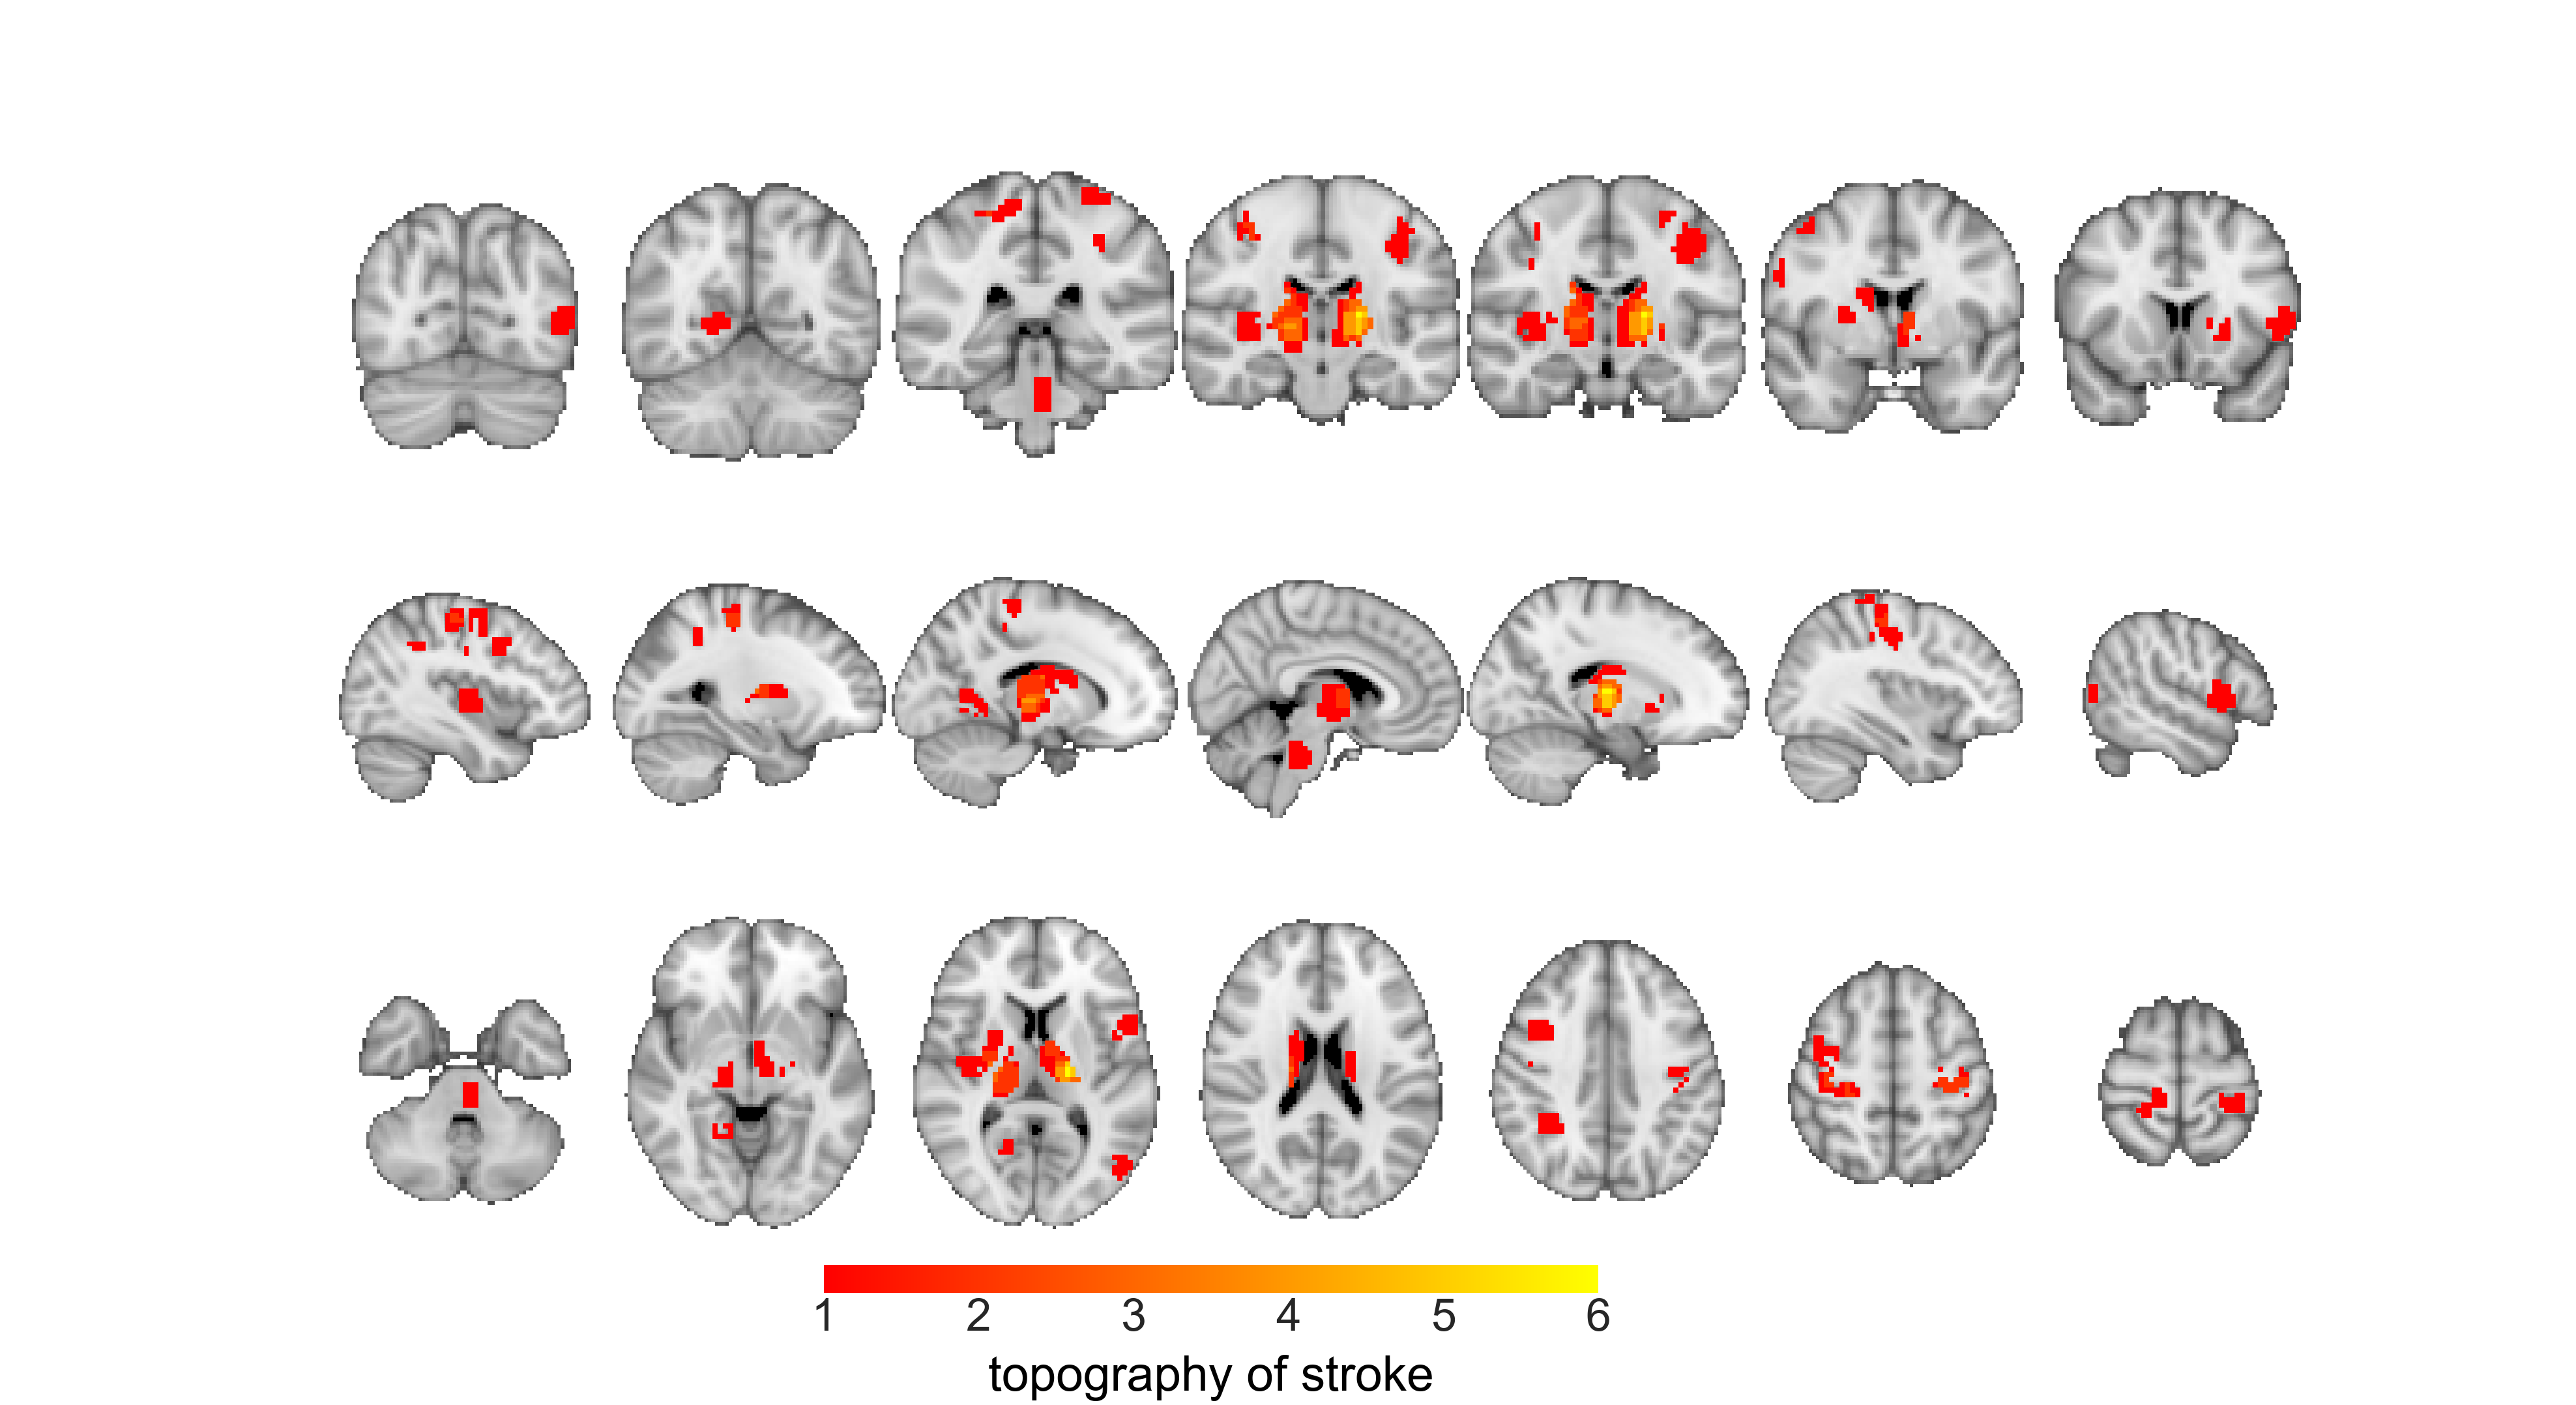

In [4]:
import matplotlib as mpl
fig = plt.figure(figsize=(55,30))
from matplotlib import gridspec

gs = gridspec.GridSpec(3,1)

ax_for_y = plt.subplot(gs[0,:])
ax_for_x = plt.subplot(gs[1,:])
ax_for_z = plt.subplot(gs[2,:])


display_y = plotting.plot_roi(roi_img = name_tmp_B, 
                              display_mode = 'y',
                              axes = ax_for_y,
                              annotate = False,
                              draw_cross=False,
                              alpha = 1.0, 
                              #cmap = mymap,
                              cmap = plt.cm.autumn,
                              threshold = 0.1,
                              dim = -0.15)

display_x = plotting.plot_roi(roi_img = name_tmp_B, 
                              display_mode = 'x',
                              axes = ax_for_x,
                              annotate = False,                              
                              draw_cross=False,
                              alpha = 1.0, 
                              cmap = plt.cm.autumn,
                              #cmap = mymap,
                              threshold = 0.1,
                              dim = -0.15)

display_z = plotting.plot_roi(roi_img = name_tmp_B, 
                              display_mode = 'z',
                              axes = ax_for_z,
                              annotate = False,                              
                              draw_cross=False,
                              alpha = 1.0, 
                              #cmap = mymap,
                              cmap = plt.cm.autumn,
                              threshold = 0.1,
                              dim = -0.15)
#display_x.annotate(size=75)
#display_z.annotate(size=75)
#display_y.annotate(size=75)

ax_cbar = fig.add_axes([0.32, 0.08, 0.30, 0.02])

norm  = mpl.colors.Normalize(vmin=B.min() +1, 
                             vmax=B.max())

bounds = np.arange(B.max() +1 )

cb    = mpl.colorbar.ColorbarBase(ax_cbar, #cmap=mymap,
                                  cmap = plt.cm.autumn,
                                  norm=norm,
                                  orientation='horizontal',
                                  ticks=bounds,
                                  format = '%1i')

cb.ax.tick_params(labelsize=70)

fig.text(0.47, 0.02, 'topography of stroke', size=75, rotation=0,
         backgroundcolor = 'white', color = 'k',
         ha="center", va="center")

#fig.tight_layout(rect=[0, 0.03, 0.5, 0.90])

fig.tight_layout()

## coronal

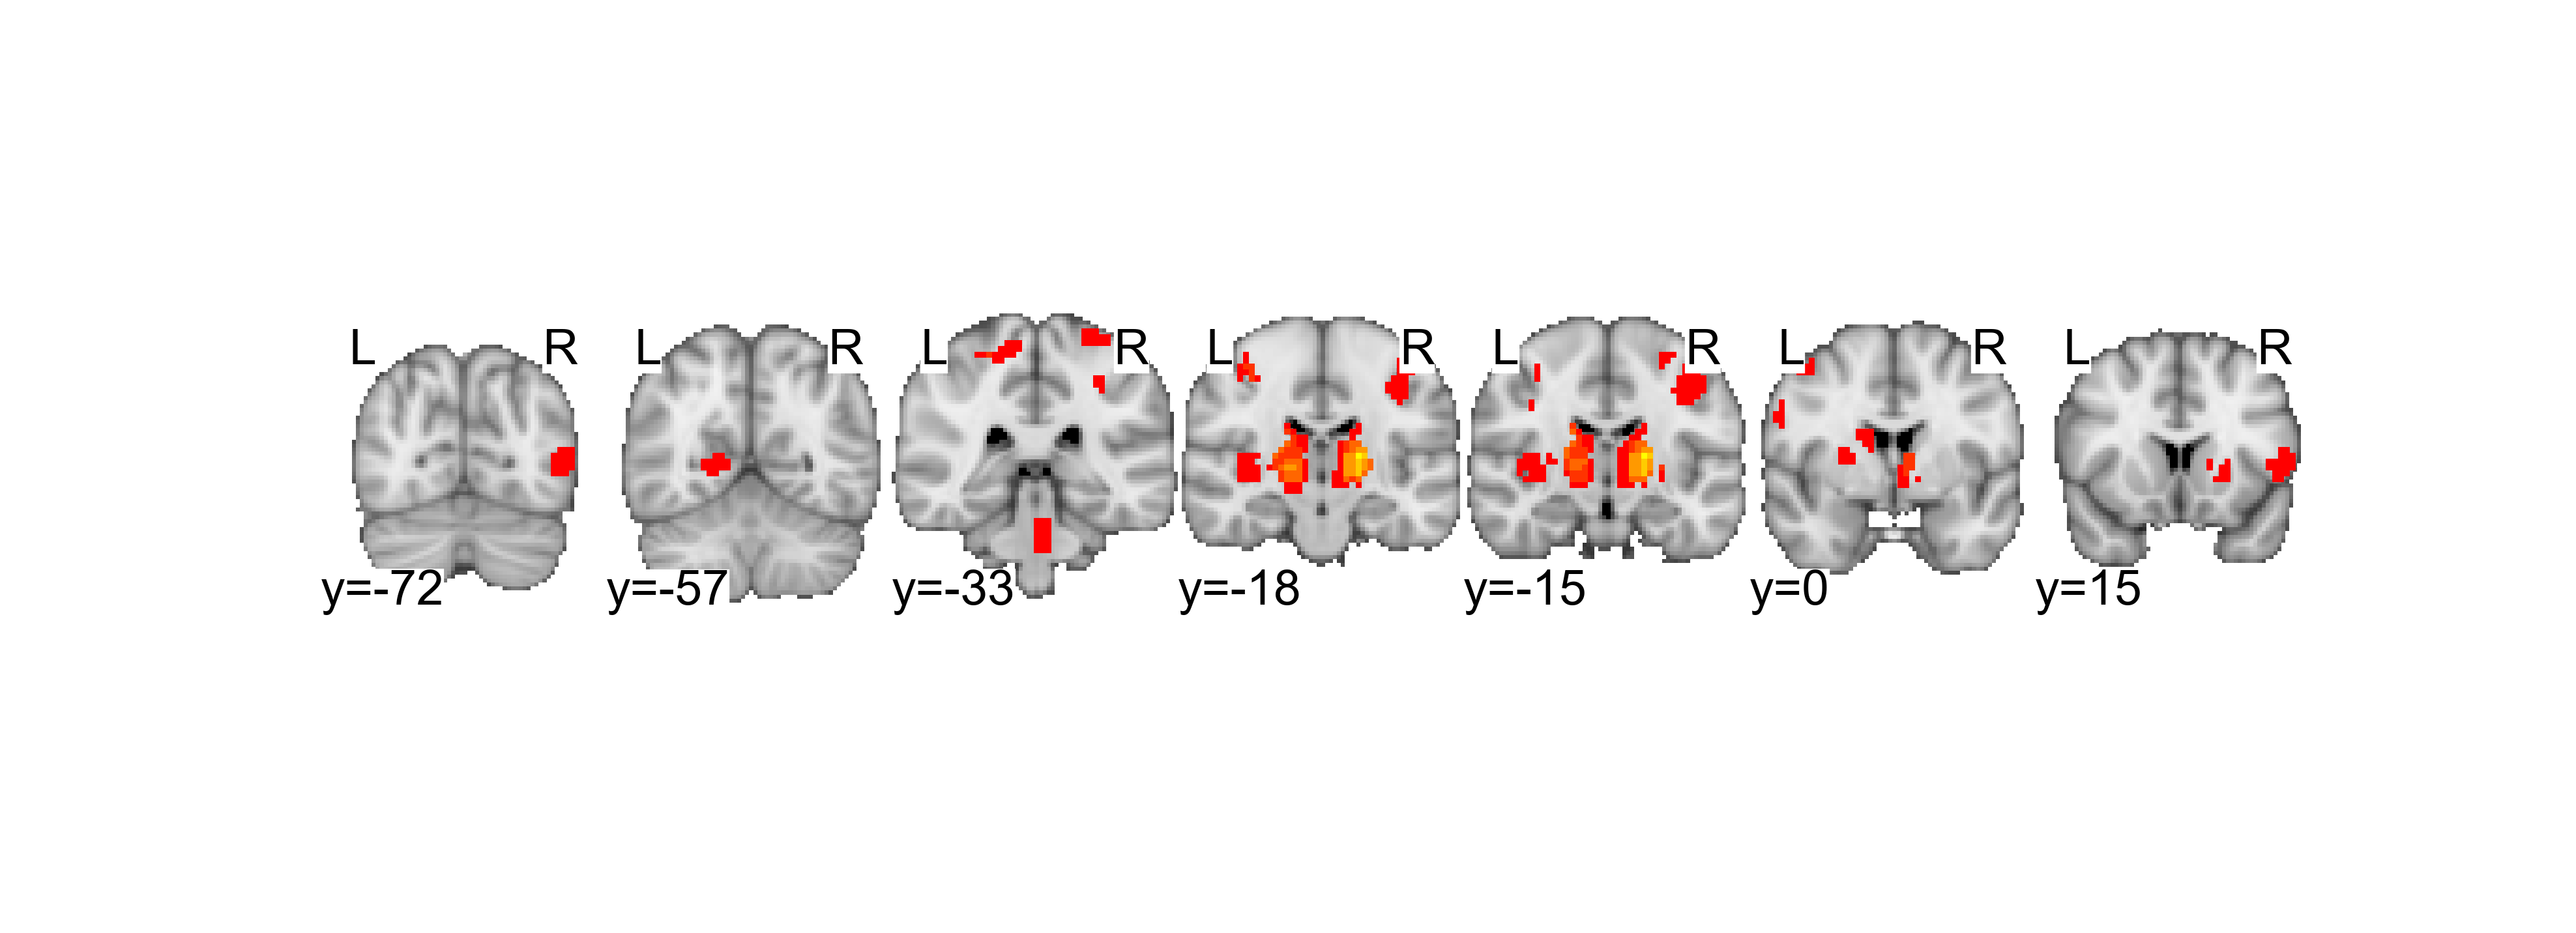

In [5]:
import matplotlib as mpl
from matplotlib import gridspec

fig = plt.figure(figsize=(55,20))

gs = gridspec.GridSpec(1,1)

ax_for_y = plt.subplot(gs[0,:])

display_y = plotting.plot_roi(roi_img = name_tmp_B, 
                              display_mode = 'y',
                              axes = ax_for_y,
                              annotate = False,
                              draw_cross=False,
                              alpha = 1, 
                              cmap = plt.cm.autumn,
                              #cmap = plt.cm.plasma,
                              threshold = 0.1,
                              dim = -0.15)

display_y.annotate(size=75)
fig.tight_layout()

## sagittal

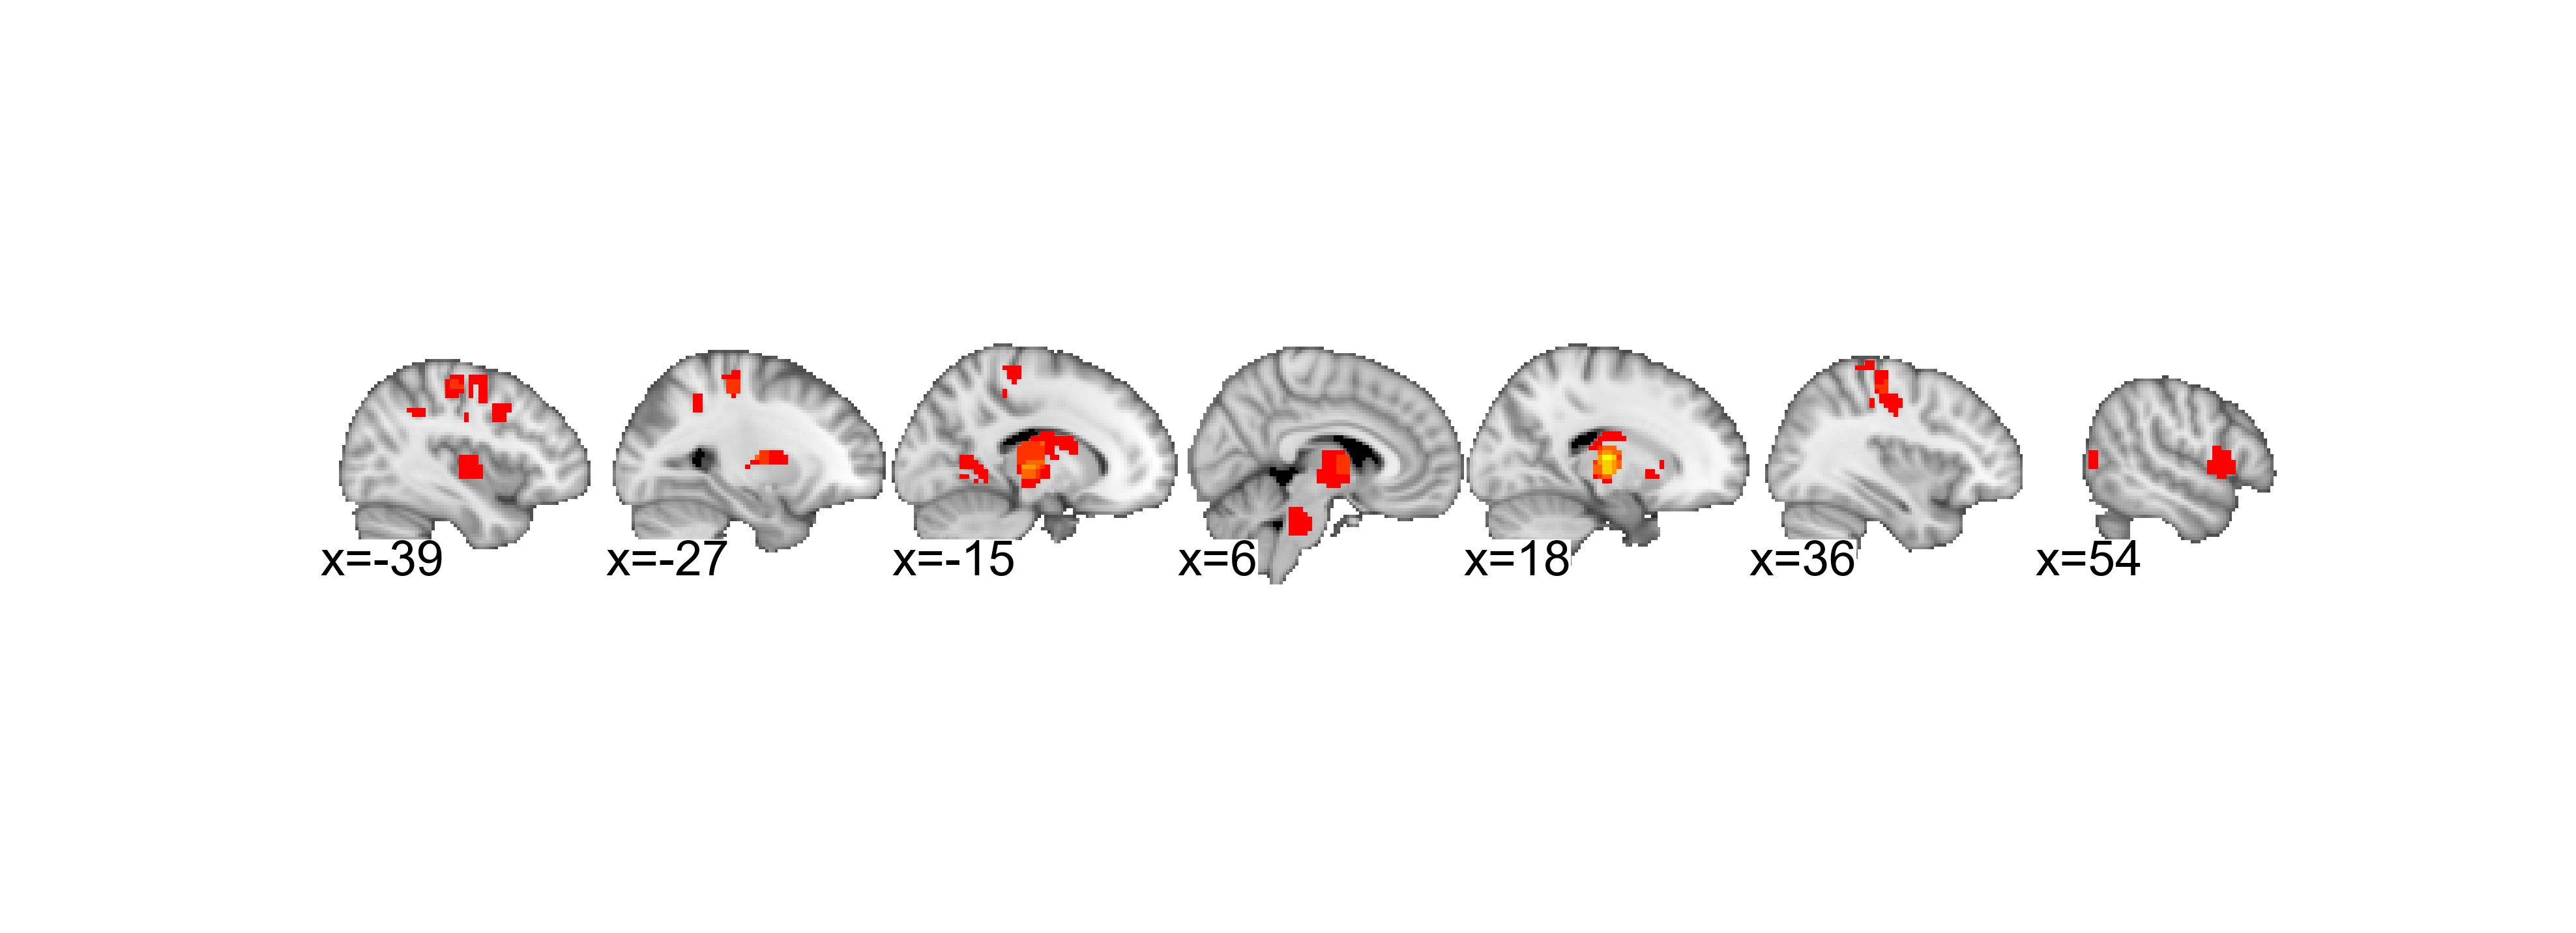

In [6]:
import matplotlib as mpl
from matplotlib import gridspec

fig = plt.figure(figsize=(55,20))

gs = gridspec.GridSpec(1,1)

ax_for_x = plt.subplot(gs[0,:])

display_x = plotting.plot_roi(roi_img = name_tmp_B, 
                              display_mode = 'x',
                              axes = ax_for_x,
                              annotate = True,
                              draw_cross=False,
                              alpha = 1, 
                              cmap = plt.cm.autumn,
                              #cmap = plt.cm.plasma,
                              threshold = 0.1,
                              dim = -0.15)

display_x.annotate(size=75)
fig.tight_layout()

## axial

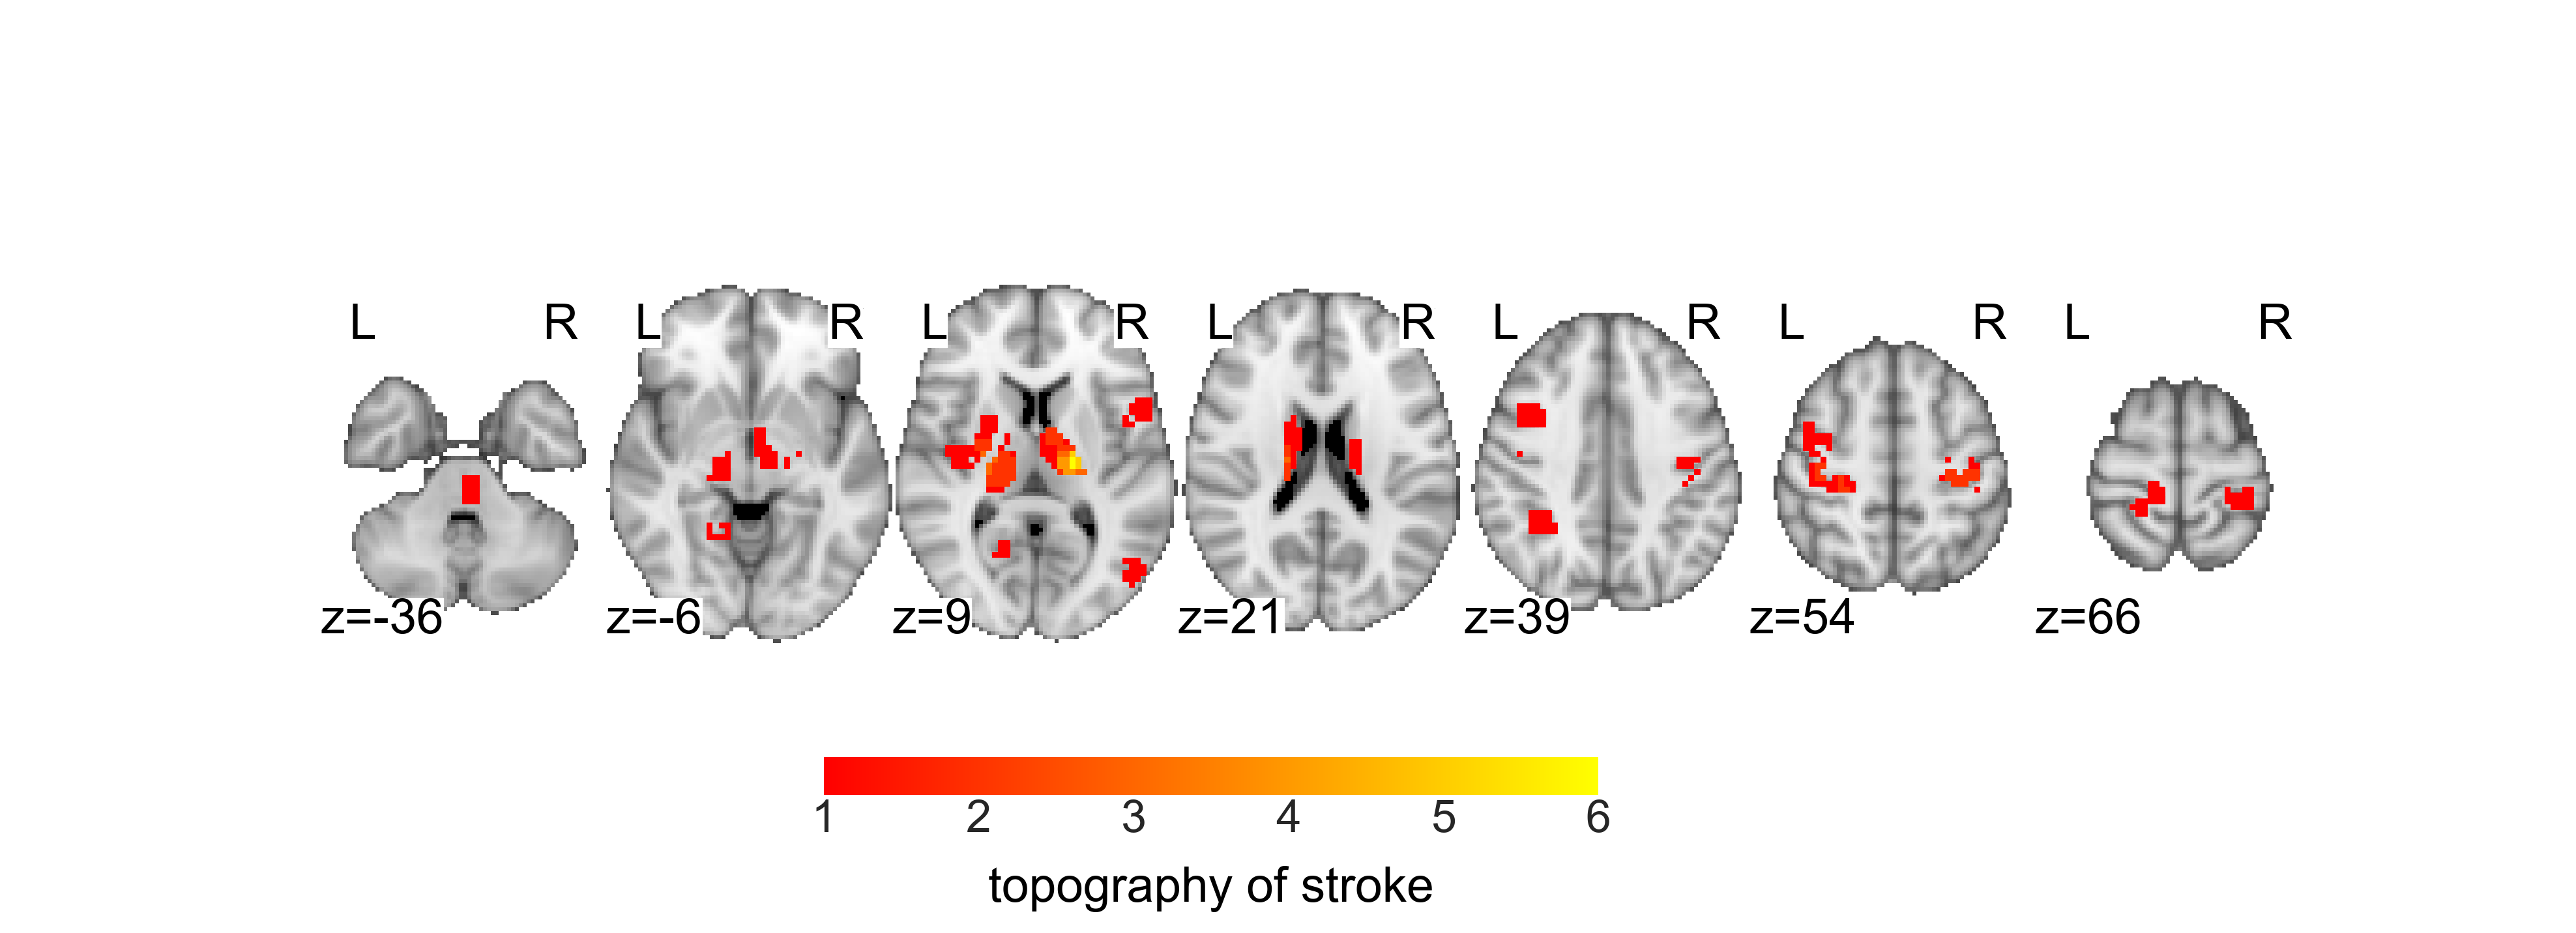

In [7]:
import matplotlib as mpl
from matplotlib import gridspec

fig = plt.figure(figsize=(55,20))

gs = gridspec.GridSpec(1,1)

ax_for_z = plt.subplot(gs[0,:])

display_z = plotting.plot_roi(roi_img = name_tmp_B, 
                              display_mode = 'z',
                              axes = ax_for_z,
                              annotate = True,
                              draw_cross=False,
                              alpha = 1, 
                              cmap = plt.cm.autumn,
                              threshold = 0.1,
                              dim = -0.15)
display_z.annotate(size=75)

ax_cbar = fig.add_axes([0.32, 0.15, 0.30, 0.04])

norm  = mpl.colors.Normalize(vmin=B.min() +1, 
                             vmax=B.max())

bounds = np.arange(B.max() +1 )

cb    = mpl.colorbar.ColorbarBase(ax_cbar, #cmap=mymap,
                                  cmap = plt.cm.autumn,
                                  norm=norm,
                                  orientation='horizontal',
                                  ticks=bounds,
                                  format = '%1i')


cb.ax.tick_params(labelsize=70)

fig.text(0.47, 0.05, 'topography of stroke', size=75, rotation=0,
         backgroundcolor = 'white', color = 'k',
         ha="center", va="center")



fig.tight_layout()

## probability of being lesioned

In [8]:

list_name    = '/data/pt_mar006/documents/all_sd_after_qc_nohistory.txt'
with open(list_name) as f:
    subject_list = f.read().splitlines()

# to sum all binarized lesion files
data_dir = '/data/pt_mar006/subjects_masks/'
les_nam  = 'lesion_mask_mni_dilated_gm.nii.gz'

# create template array at mni space 
mni_dir = '/data/pt_mar006/subjects_group/'
mni_3mm    = os.path.join(mni_dir, 'MNI152_T1_3mm_brain.nii.gz')
mni_affine = nb.load(mni_3mm).get_affine()

A  = np.zeros(nb.load(mni_3mm).get_data().shape)

for subject_id in subject_list:
    tmp_file = os.path.join(data_dir, subject_id, les_nam)
    tmp = nb.load(tmp_file).get_data()  
    A  += tmp

print A.shape
print A.min(), A.max()

number_of_patients = 28 
A = A / number_of_patients    
print A.min(), A.max()

img_tmp_A  = nb.Nifti1Image(A, mni_affine)
name_tmp_A = os.path.join(mni_dir, 'lesions_sum_wholebrain_prop.nii.gz')
nb.save(img_tmp_A, name_tmp_A)


(61, 73, 61)
0.0 6.0
0.0 0.21428571428571427


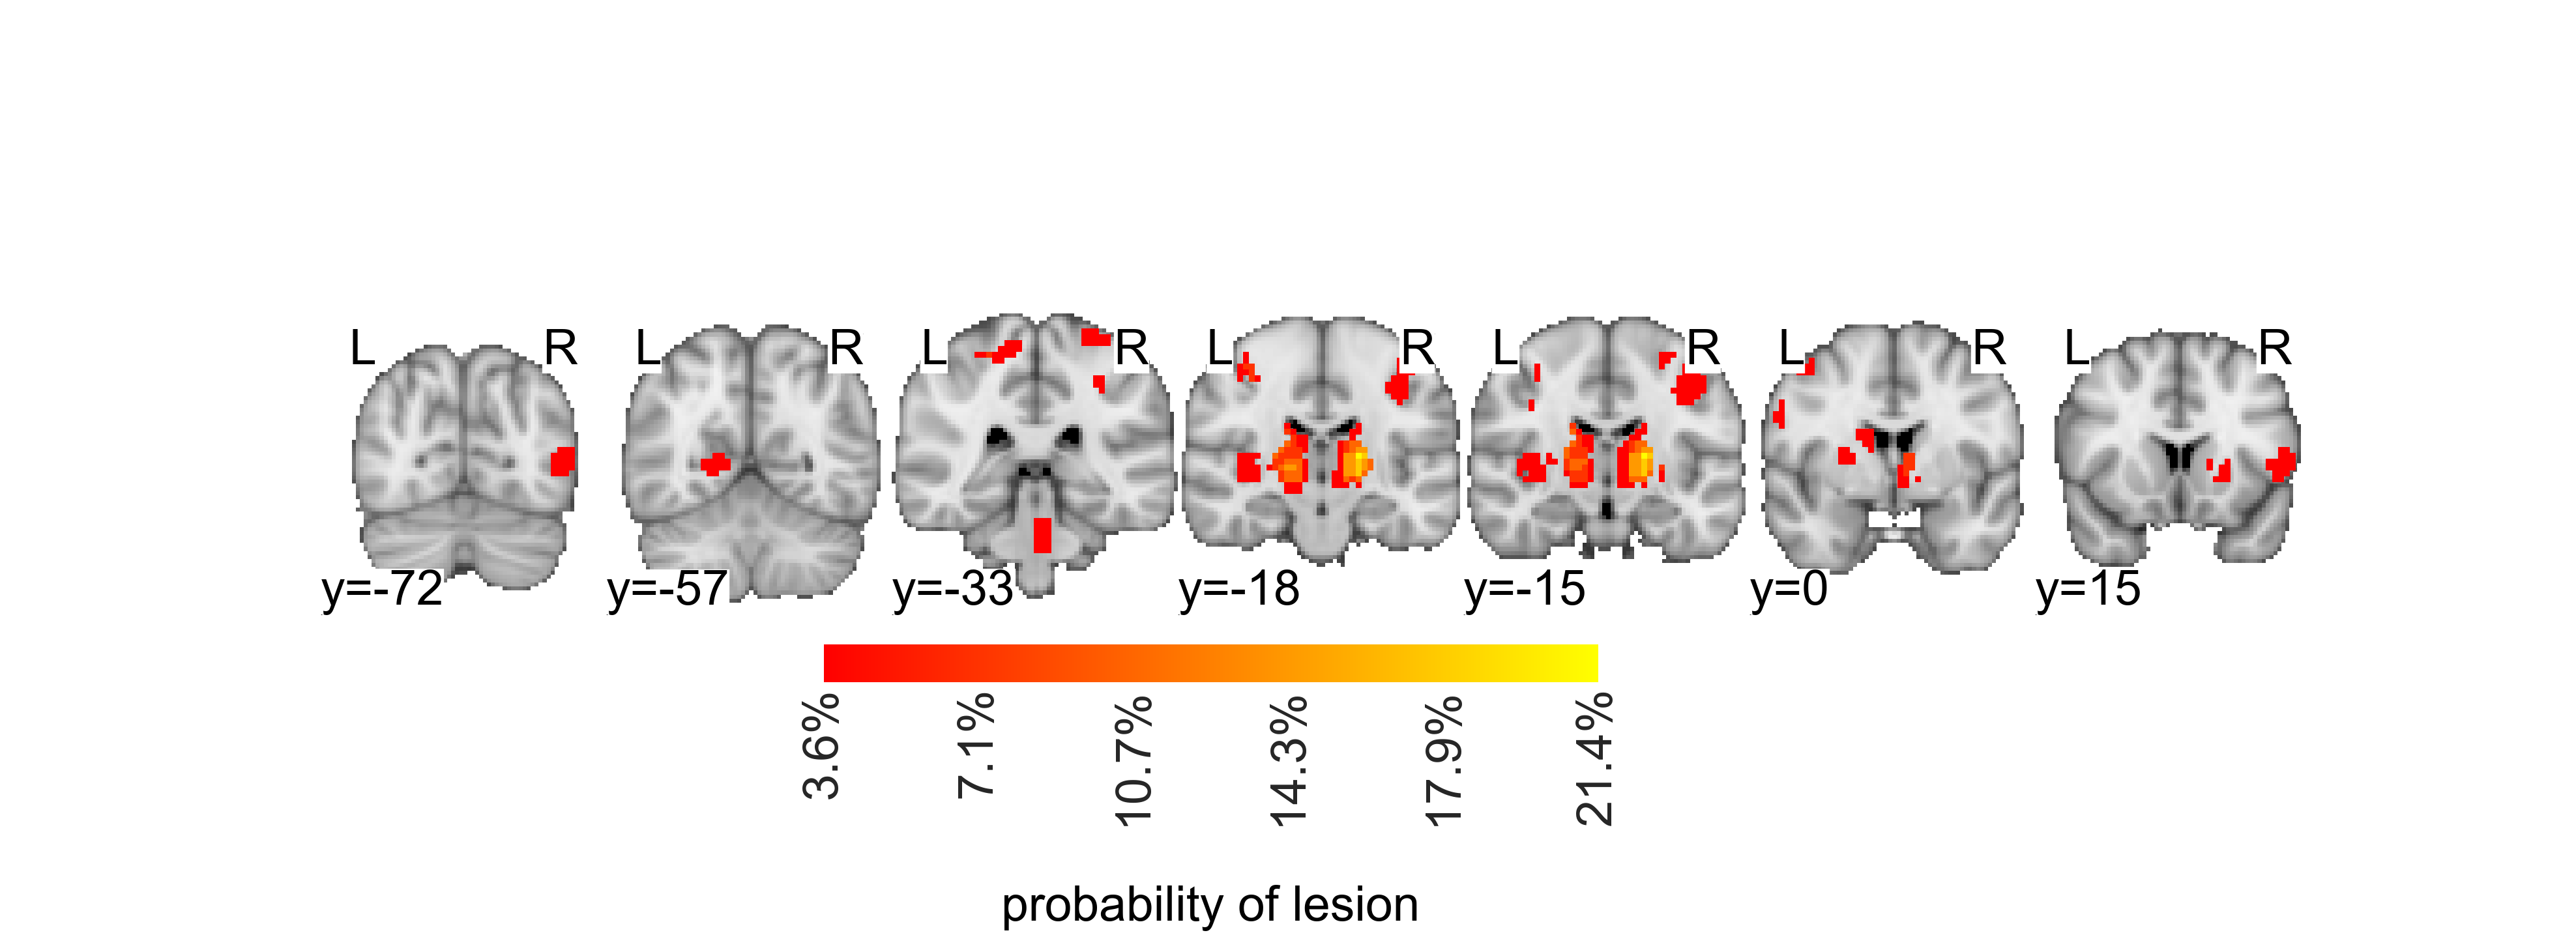

In [9]:
import matplotlib as mpl
from matplotlib import gridspec

fig = plt.figure(figsize=(55,20))

gs = gridspec.GridSpec(1,1)

ax_for_y = plt.subplot(gs[0,:])

display_y = plotting.plot_roi(roi_img = name_tmp_A, 
                              display_mode = 'y',
                              axes = ax_for_y,
                              annotate = True,
                              draw_cross=False,
                              alpha = 1, 
                              cmap = plt.cm.autumn,
                              threshold = 0,
                              dim = -0.15)
display_y.annotate(size=75)


ax_cbar = fig.add_axes([0.32, 0.27, 0.30, 0.04])
norm  = mpl.colors.Normalize(vmin = 1. / number_of_patients, 
                             vmax = 6. / number_of_patients)

bounds = np.arange(1, 7) / float(number_of_patients) # to be plotted
bounds_perc = bounds * 100

list_label = [ j for i,j in enumerate(bounds_perc)]
formattedList = ["%.1f" % member + '%' for member in list_label] # to be tick label

cb    = mpl.colorbar.ColorbarBase(ax_cbar, 
                                  cmap = plt.cm.autumn,
                                  norm=norm,
                                  orientation='horizontal',
                                  ticks=bounds,
                                  )

cb.ax.tick_params(labelsize=70)
cb.ax.set_xticklabels(formattedList,rotation=90, fontsize=75)

fig.text(0.47, 0.03, 'probability of lesion',
         size=75, rotation=0,
         backgroundcolor = 'white', color = 'k',
         ha="center", va="center")

fig.tight_layout()

In [10]:
1/float(28), 6/float(28)

(0.03571428571428571, 0.21428571428571427)

In [11]:
bounds = (np.arange(1,7) / 28.0)
bounds

array([0.03571429, 0.07142857, 0.10714286, 0.14285714, 0.17857143,
       0.21428571])